# Assigning Data

In [1]:
import os
import csv

In [2]:
base_dir = '.\\Images'
folders = os.listdir(base_dir)
folders_dir = [os.path.join(base_dir,folder) for folder in folders]

print(folders_dir)

['.\\Images\\Artificial-Agro', '.\\Images\\Artificial-Kahoy', '.\\Images\\Artificial-Mangga', '.\\Images\\Artificial-Maysawa', '.\\Images\\Artificial-Organic', '.\\Images\\Indirect-Agro', '.\\Images\\Indirect-Kahoy', '.\\Images\\Indirect-Mangga', '.\\Images\\Indirect-Maysawa', '.\\Images\\Indirect-Organic']


In [3]:
final_images = []
for folder in folders_dir:
    images = [os.path.join(folder,image) for image in os.listdir(folder)]
    final_images.extend(images)
final_images

['.\\Images\\Artificial-Agro\\artificial_agro_1.jpg',
 '.\\Images\\Artificial-Agro\\artificial_agro_10.jpg',
 '.\\Images\\Artificial-Agro\\artificial_agro_11.jpg',
 '.\\Images\\Artificial-Agro\\artificial_agro_12.jpg',
 '.\\Images\\Artificial-Agro\\artificial_agro_13.jpg',
 '.\\Images\\Artificial-Agro\\artificial_agro_14.jpg',
 '.\\Images\\Artificial-Agro\\artificial_agro_15.jpg',
 '.\\Images\\Artificial-Agro\\artificial_agro_16.jpg',
 '.\\Images\\Artificial-Agro\\artificial_agro_17.jpg',
 '.\\Images\\Artificial-Agro\\artificial_agro_18.jpg',
 '.\\Images\\Artificial-Agro\\artificial_agro_19.jpg',
 '.\\Images\\Artificial-Agro\\artificial_agro_2.jpg',
 '.\\Images\\Artificial-Agro\\artificial_agro_20.jpg',
 '.\\Images\\Artificial-Agro\\artificial_agro_3.jpg',
 '.\\Images\\Artificial-Agro\\artificial_agro_4.jpg',
 '.\\Images\\Artificial-Agro\\artificial_agro_5.jpg',
 '.\\Images\\Artificial-Agro\\artificial_agro_6.jpg',
 '.\\Images\\Artificial-Agro\\artificial_agro_7.jpg',
 '.\\Images\\Arti

In [4]:
final_data = []
with open('.\\data_values.csv','r',encoding='utf-8') as file:
    reader = csv.reader(file)
    for row in reader:
        for image in final_images:
            test = image.split("\\")[-1].replace(".jpg","").replace("indirect_","")
            if row[0].strip() == test.strip():
                final_data.append([image,[row[1],row[2]]])
            test = image.split("\\")[-1].replace(".jpg","").replace("artificial_","")
            if row[0].strip() == test.strip():
                final_data.append([image,[row[1],row[2]]])
            print(test)

agro_1
agro_10
agro_11
agro_12
agro_13
agro_14
agro_15
agro_16
agro_17
agro_18
agro_19
agro_2
agro_20
agro_3
agro_4
agro_5
agro_6
agro_7
agro_8
agro_9
kahoy_1
kahoy_10
kahoy_11
kahoy_12
kahoy_13
kahoy_14
kahoy_15
kahoy_16
kahoy_17
kahoy_18
kahoy_19
kahoy_2
kahoy_20
kahoy_3
kahoy_4
kahoy_5
kahoy_6
kahoy_7
kahoy_8
kahoy_9
mangga_1
mangga_10
mangga_11
mangga_12
mangga_13
mangga_14
mangga_15
mangga_16
mangga_17
mangga_18
mangga_19
mangga_2
mangga_20
mangga_3
mangga_4
mangga_6
mangga_7
mangga_8
mangga_9
maysawa_1
maysawa_10
maysawa_11
maysawa_12
maysawa_13
maysawa_14
maysawa_15
maysawa_16
maysawa_17
maysawa_18
maysawa_19
maysawa_2
maysawa_20
maysawa_3
maysawa_4
maysawa_5
maysawa_6
maysawa_7
maysawa_8
maysawa_9
organic_1
organic_10
organic_11
organic_12
organic_13
organic_14
organic_15
organic_16
organic_17
organic_18
organic_19
organic_2
organic_20
organic_3
organic_4
organic_5
organic_6
organic_7
organic_8
organic_9
indirect_agro_1
indirect_agro_10
indirect_agro_11
indirect_agro_12
indirec

In [5]:
with open("final_data.csv", 'w') as f:
    writer = csv.writer(f)
    for row in final_data:
        writer.writerow(row)

# Model Training

In [481]:
import pandas as pd
import cv2
import tensorflow as tf
import numpy as np

## Constants

In [482]:
IMAGE_SIZE = (32,32)

## Data Loaders

In [585]:
df = pd.read_csv('.\\final_data.csv',  names=["path","value"])

In [586]:
df.head()

,path,value
0,.\Images\Artificial-Agro\artificial_agro_2.jpg,"['0.18', '4.23']"
1,.\Images\Indirect-Agro\indirect_agro_2.jpg,"['0.18', '4.23']"
2,.\Images\Artificial-Agro\artificial_agro_3.jpg,"['0.2', '3.83']"
3,.\Images\Indirect-Agro\indirect_agro_3.jpg,"['0.2', '3.83']"
4,.\Images\Artificial-Agro\artificial_agro_4.jpg,"['0.3', '3.92']"


In [587]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # # rescale=1./255
        # rescale=1.,
        width_shift_range = 0.5,
        height_shift_range = 0.5, 
        # zoom_range = 0.2,
        # shear_range = 0.2,
        horizontal_flip = True,
        vertical_flip = True,
    #  channel_shift_range = 64.0,
        # brightness_range = (0.7,1.0),
        rotation_range = 45,
    )

data_generator = generator.flow_from_dataframe(
    df, 
    x_col="path", 
    y_col="value", 
    class_mode='raw', 
    batch_size=198,
    target_size=IMAGE_SIZE,
    )

Found 196 validated image filenames.


In [588]:
Xs = []
Ys = []
iterations = 10
for i in range(iterations):
    x,y = next(data_generator)
    Xs.extend([np.array(value).astype(int) for value in x])
    Ys.extend([np.array(value.replace("'","")[1:-1].split(', ')).astype(float) for value in y])

In [589]:
print(len(Xs))
print(len(Ys))

1960
1960


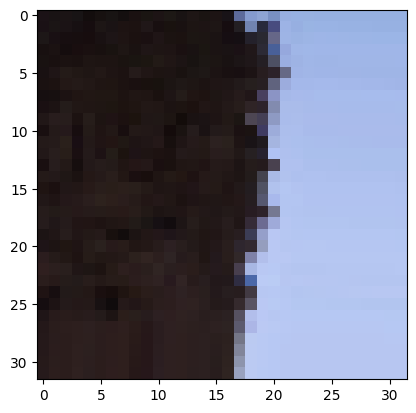

In [590]:
import matplotlib.pyplot as plt
plt.imshow(Xs[999])

In [607]:
def center_crop(img, dim):
  """Returns center cropped image

  Args:
  img: image to be center cropped
  dim: dimensions (width, height) to be cropped from center
  """
  center = img.shape
  h = img.shape[0]
  w = img.shape[1]
  x = center[1]/2 - dim/2
  y = center[0]/2 - dim/2

  crop_img = img[int(y):int(y+h), int(x):int(x+w)]
  return crop_img

def get_mask(image):
    image = image.astype(np.uint8)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    binr = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    binr = np.invert(binr)

    # Eroding to remove noise and small white regions
    kernel = np.ones((3, 3), np.uint8)
    mask = cv2.erode(binr, kernel, iterations=3)
    
    return mask

def process_image(image):
    rgb_image = image.astype(np.uint8)

    mask = get_mask(rgb_image)
    result = cv2.bitwise_and(rgb_image, rgb_image, mask=mask)

    # # Find the bounding box coordinates (non-zero pixels)
    # non_zero_coords = np.argwhere(output > 0)
    # min_y, min_x, _ = non_zero_coords.min(axis=0)
    # max_y, max_x, _ = non_zero_coords.max(axis=0)

    # # Crop the region to include only non-zero pixels
    # cropped_region = output[min_y:max_y + 1, min_x:max_x + 1]
    # shape = cropped_region.shape[0]
    # if cropped_region.shape[0] > cropped_region.shape[1]: shape = cropped_region.shape[1]

    # cropped_region = center_crop(cropped_region, shape)

    rgb_planes = cv2.split(result)
    result_planes = []
    for plane in rgb_planes:
        processed_image = cv2.medianBlur(plane, 3)
        result_planes.append(processed_image)
    result = cv2.merge(result_planes)

    return result

In [608]:
MAXPH = np.max(np.array(Ys)[:,1])
MINPH = np.min(np.array(Ys)[:,1])

MAXMOISTURE = np.max(np.array(Ys)[:,0])
MINMOISTURE = np.min(np.array(Ys)[:,0])

In [609]:
def process_label(image, label, maxPh, minPh, maxMoisture, minMoisture):
    mask = get_mask(np.array(image))
    shape = mask.shape 
    array = np.ones(shape=(shape[0], shape[1], 1))

    # Apply bitwise_and operation
    moisture = cv2.bitwise_and(array, array, mask=mask)
    ph = cv2.bitwise_and(array, array, mask=mask)

    # Scale the label values and apply them
    moisture_value = (label[0] - minMoisture) / (maxMoisture - minMoisture)
    ph_value = (label[1] - minPh) / (maxPh - minPh)
    moisture[moisture > 0] = moisture_value
    ph[ph > 0] = ph_value

    # Optionally handle background (not necessary if just segmenting)
    # inv_mask = cv2.bitwise_not(mask)  # This would create a 2D mask, need to ensure it's 3D for compatibility
    # background = cv2.bitwise_and(array, array, mask=inv_mask)

    # Merge moisture and ph channels
    output = np.stack([moisture, ph], axis=-1)  # Add 'background' if using inv_mask

    return output


In [610]:
sample = process_label(Xs[1], Ys[1], MAXPH, MINPH, MAXMOISTURE, MINMOISTURE)
for s in sample:
    print(s)


[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.

In [611]:
# def process_label(label, maxPh, minPh, maxMoisture, minMoisture):
#     moisture = (label[0] - minMoisture) / (maxMoisture - minMoisture) 
#     ph = (label[1] - minPh) / (maxPh - minPh)
#     output = [moisture, ph]
#     return output
# 

In [612]:
# def unprocess_label(label, maxPh, minPh, maxMoisture, minMoisture):
#     moisture = label[:,0] * (maxPh - minPh) + minPh
#     ph = label[:,1] * (maxMoisture - minMoisture) + minMoisture
#     output = [moisture, ph]
#     return output

# def unnormalize_label(normalized_label, maxPh, minPh, maxMoisture, minMoisture):
#     # Reverse the normalization process for pH and moisture separately
#     unnormalized_ph = normalized_label[0] * (maxPh - minPh) + minPh
#     unnormalized_moisture = normalized_label[1] * (maxMoisture - minMoisture) + minMoisture
    
#     # Stack unnormalized pH and moisture values along the last axis to form a 2-channel output
#     unnormalized_label = np.stack([unnormalized_moisture, unnormalized_ph], axis=-1)
    
#     return unnormalized_label


In [613]:
Y_values = []
X_values = []
for i, x in enumerate(Xs):
    print(i)
    Y_values.append(process_label(Xs[i], Ys[i], MAXPH, MINPH, MAXMOISTURE, MINMOISTURE))
    # Y_values.append(process_label(Ys[i], MAXPH, MINPH, MAXMOISTURE, MINMOISTURE))
    X_values.append(process_image(Xs[i]))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

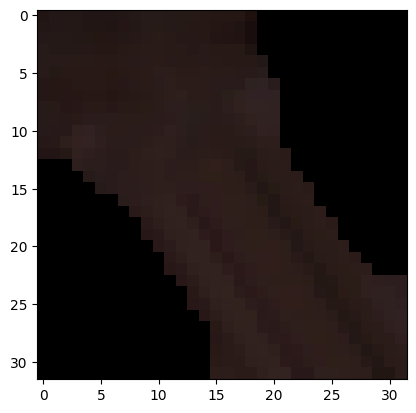

In [614]:
plt.imshow(X_values[91])

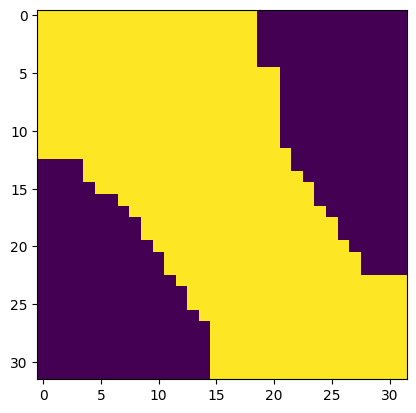

In [615]:
plt.imshow(Y_values[91][:,:,0])


In [616]:
Y_values[91][:,:,1]

array([[0.13888889, 0.13888889, 0.13888889, ..., 0.        , 0.        ,
        0.        ],
       [0.13888889, 0.13888889, 0.13888889, ..., 0.        , 0.        ,
        0.        ],
       [0.13888889, 0.13888889, 0.13888889, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.13888889, 0.13888889,
        0.13888889],
       [0.        , 0.        , 0.        , ..., 0.13888889, 0.13888889,
        0.13888889],
       [0.        , 0.        , 0.        , ..., 0.13888889, 0.13888889,
        0.13888889]])

In [618]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_values,Y_values , 
                                #    random_state=23,  
                                   test_size=0.20,  
                                   shuffle=True) 

## Training

In [619]:
from tensorflow.keras.layers import Reshape, Dense, Dropout, BatchNormalization, Input, Flatten, LeakyReLU, ReLU, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, concatenate, Activation
# from tensorflow.keras.utils import plot_model
# from tensorflow.keras.backend import clear_session
# from tensorflow.keras.optimizers import Adam, RMSprop , SGD
from tensorflow.keras import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
# from tensorflow.keras.regularizers import L2
# from tensorflow.keras import metrics
from tensorflow.keras import layers
from tensorflow import keras
import keras_tuner as kt
from keras import backend as K

import tensorflow as tf

In [620]:
# Defining the Convolutional Block
def conv_block(inputs, num_filters):
	# Applying the sequence of Convolutional, Batch Normalization
	# and Activation Layers to the input tensor
	x = Sequential([
		# Convolutional Layer
		Conv2D(num_filters, 1, padding='same'),
		# Batch Normalization Layer
		BatchNormalization(),
		# Activation Layer
		ReLU(),
		# Convolutional Layer
		Conv2D(num_filters, 1, padding='same'),
		# Batch Normalization Layer
		BatchNormalization(),
		# Activation Layer
		ReLU()
	])(inputs)

	# Returning the output of the Convolutional Block
	return x

# Defining the Unet++ Model
def unet_plus_plus_model(hp):
	inputs = Input(shape=IMAGE_SIZE+(3,))
	hp_filters = hp.Choice('filters',values = [16,32,64,128])
	# Encoding Path
	x_00 = conv_block(inputs, hp_filters)
	x_10 = conv_block(MaxPooling2D()(x_00), hp_filters*2)
	x_20 = conv_block(MaxPooling2D()(x_10), hp_filters*4)
	x_30 = conv_block(MaxPooling2D()(x_20), hp_filters*8)
	x_40 = conv_block(MaxPooling2D()(x_30), hp_filters*16)

	# Nested Decoding Path
	x_01 = conv_block(concatenate(
		[x_00, UpSampling2D()(x_10)]), hp_filters)
	x_11 = conv_block(concatenate(
		[x_10, UpSampling2D()(x_20)]), hp_filters*2)
	x_21 = conv_block(concatenate(
		[x_20, UpSampling2D()(x_30)]), hp_filters*4)
	x_31 = conv_block(concatenate(
		[x_30, UpSampling2D()(x_40)]), hp_filters*8)

	x_02 = conv_block(concatenate(
		[x_00, x_01, UpSampling2D()(x_11)]), hp_filters)
	x_12 = conv_block(concatenate(
		[x_10, x_11, UpSampling2D()(x_21)]), hp_filters*2)
	x_22 = conv_block(concatenate(
		[x_20, x_21, UpSampling2D()(x_31)]), hp_filters*4)

	x_03 = conv_block(concatenate(
		[x_00, x_01, x_02, UpSampling2D()(x_12)]), hp_filters)
	x_13 = conv_block(concatenate(
		[x_10, x_11, x_12, UpSampling2D()(x_22)]), hp_filters*2)

	x_04 = conv_block(concatenate(
		[x_00, x_01, x_02, x_03, UpSampling2D()(x_13)]), hp_filters)
	
	outputs = tf.keras.layers.Conv2D(3, 1, activation='sigmoid')(x_04)

	# Creating the model
	model = tf.keras.Model(
		inputs=inputs, outputs=outputs, name='Unet_plus_plus')
	
	hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])
	model.compile(optimizer=tf.keras.optimizers.Adam(hp_learning_rate), loss='binary_crossentropy', metrics=['acc'])
	# Returning the model
	return model




In [639]:
# Defining the Convolutional Block
def conv_block(inputs, num_filters):
	# Applying the sequence of Convolutional, Batch Normalization
	# and Activation Layers to the input tensor
	x = Sequential([
		# Convolutional Layer
		Conv2D(num_filters, 1, padding='same'),
		# Batch Normalization Layer
		BatchNormalization(),
		# Activation Layer
		ReLU(),
		# Convolutional Layer
		Conv2D(num_filters, 1, padding='same'),
		# Batch Normalization Layer
		# BatchNormalization(),
		# Activation Layer
		ReLU()
	])(inputs)

	# Returning the output of the Convolutional Block
	return x

def dense_block(units, dropout_rate):
    return Sequential([
        Dense(units, activation='relu'),
        Dropout(dropout_rate)
    ])

# Defining the Unet++ Model
def unet_plus_plus_model():
	inputs = Input(shape=IMAGE_SIZE+(3,))
	# Encoding Path
	filters = 64
	x_00 = conv_block(inputs, filters)
	x_10 = conv_block(MaxPooling2D()(x_00), filters*2)
	x_20 = conv_block(MaxPooling2D()(x_10), filters*4)
	x_30 = conv_block(MaxPooling2D()(x_20), filters*8)
	x_40 = conv_block(MaxPooling2D()(x_30), filters*16)
 
	print("x_40",x_40.shape)
	flattened = Flatten()(x_40)
	dense = dense_block(4096, 0.2)(flattened)
	dense = dense_block(4096, 0.2)(dense)
	dense = dense_block(4096, 0.2)(dense)
	dense = dense_block(4096, 0.2)(dense)
	reshaped = Reshape((2, 2, 1024))(dense)  # Reshape to reintroduce spatial dimensions

 
	# Nested Decoding Path
	x_01 = conv_block(concatenate(
		[x_00, UpSampling2D()(x_10)]), filters)
	x_11 = conv_block(concatenate(
		[x_10, UpSampling2D()(x_20)]), filters*2)
	x_21 = conv_block(concatenate(
		[x_20, UpSampling2D()(x_30)]), filters*4)
	x_31 = conv_block(concatenate(
		[x_30, UpSampling2D()(reshaped)]), filters*8)

	x_02 = conv_block(concatenate(
		[x_00, x_01, UpSampling2D()(x_11)]), filters)
	x_12 = conv_block(concatenate(
		[x_10, x_11, UpSampling2D()(x_21)]), filters*2)
	x_22 = conv_block(concatenate(
		[x_20, x_21, UpSampling2D()(x_31)]), filters*4)

	x_03 = conv_block(concatenate(
		[x_00, x_01, x_02, UpSampling2D()(x_12)]), filters)
	x_13 = conv_block(concatenate(
		[x_10, x_11, x_12, UpSampling2D()(x_22)]), filters*2)

	x_04 = conv_block(concatenate(
		[x_00, x_01, x_02, x_03, UpSampling2D()(x_13)]), filters)
	
	outputs = tf.keras.layers.Conv2D(2, 1, activation='sigmoid')(x_04)

	# Creating the model
	model = tf.keras.Model(
		inputs=inputs, outputs=outputs, name='Unet_plus_plus')
	
	# hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])
	model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss='binary_crossentropy', metrics=['acc'])
	# Returning the model
	return model




In [640]:
# import tensorflow as tf
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, MaxPooling2D, concatenate, UpSampling2D, Dense, Flatten, Reshape
# from tensorflow.keras import Sequential

# def conv_block(inputs, num_filters, kernel_size=3, activation='relu'):
#     x = Conv2D(num_filters, kernel_size, padding='same')(inputs)
#     x = BatchNormalization()(x)
#     x = ReLU()(x)
#     x = Conv2D(num_filters, kernel_size, padding='same')(x)
#     x = BatchNormalization()(x)
#     x = ReLU()(x)
#     return x

# def dense_block(units, dropout_rate):
#     return Sequential([
#         Dense(units, activation='relu'),
#         Dropout(dropout_rate)
#     ])

# def unet_plus_plus_model(image_size):
#     inputs = Input(shape=image_size + (3,))
    
#     # Encoder path
#     filters = 64
#     x_00 = conv_block(inputs, filters)
#     x_10 = conv_block(MaxPooling2D()(x_00), filters*2)
#     x_20 = conv_block(MaxPooling2D()(x_10), filters*4)
#     x_30 = conv_block(MaxPooling2D()(x_20), filters*8)
#     x_40 = conv_block(MaxPooling2D()(x_30), filters*16)

#     # Dense block
#     flattened = Flatten()(x_40)
#     dense = dense_block(1024, 0.5)(flattened)
#     reshaped = Reshape((1, 1, 1024))(dense)  # Reshape to reintroduce spatial dimensions

#     # Decoder path
#     x_31 = conv_block(concatenate([x_30, UpSampling2D()(reshaped)]), filters*8)
#     x_21 = conv_block(concatenate([x_20, UpSampling2D()(x_31)]), filters*4)
#     x_11 = conv_block(concatenate([x_10, UpSampling2D()(x_21)]), filters*2)
#     x_01 = conv_block(concatenate([x_00, UpSampling2D()(x_11)]), filters)

#     # Output layer
#     outputs = Conv2D(2, 1, activation='sigmoid')(x_01)

#     # Creating the model
#     model = Model(inputs=inputs, outputs=outputs, name='Unet_plus_plus')
#     model.compile(optimizer=tf.keras.optimizers.RMSprop(1e-3), loss='binary_crossentropy', metrics=['acc'])

#     return model

# # Assuming IMAGE_SIZE is defined
# # model = unet_plus_plus_model(IMAGE_SIZE)


In [641]:
# import tensorflow as tf
# from tensorflow.keras.layers import Input, Concatenate, Conv2D, UpSampling2D, BatchNormalization, ReLU
# from tensorflow.keras.models import Model
# from tensorflow.keras.applications import MobileNetV2
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.losses import BinaryCrossentropy

# def conv_block(inputs, num_filters):
#     x = Conv2D(num_filters, 3, padding='same')(inputs)
#     x = BatchNormalization()(x)
#     x = ReLU()(x)
#     x = Conv2D(num_filters, 3, padding='same')(x)
#     x = BatchNormalization()(x)
#     x = ReLU()(x)
#     return x

# def unet_plus_plus_model(hp):
#     IMAGE_SIZE = (256, 256)  # Define input image size
    
#     # Load MobileNetV2 as the encoder
#     base_model = MobileNetV2(input_shape=IMAGE_SIZE + (3,), include_top=False, weights='imagenet')
#     encoder_layers = [base_model.get_layer(layer_name).output for layer_name in ['block_1_expand_relu', 'block_3_expand_relu', 'block_6_expand_relu', 'block_13_expand_relu', 'block_16_project_BN']]
#     encoder = Model(inputs=base_model.input, outputs=encoder_layers)
#     encoder.trainable = False  # Freeze encoder layers
    
#     # Define decoder layers
#     filters = hp.Choice('filters', values=[16, 32, 64, 128])
#     decoder_filters = [filters, filters*2, filters*4, filters*8, filters*16]
    
#     # Encoding Path (using MobileNetV2 as the encoder)
#     inputs = Input(shape=IMAGE_SIZE + (3,))
#     skips = encoder(inputs)
#     x = skips[-1]
    
#     # Nested Decoding Path
#     for i in range(len(skips)-1, 0, -1):
#         x = conv_block(Concatenate()([UpSampling2D(size=(2, 2))(x), skips[i-1]]), decoder_filters[i])
    
#     outputs = Conv2D(2, 1, activation='sigmoid')(x)

#     # Create the model
#     model = Model(inputs=inputs, outputs=outputs, name='Unet_plus_plus')
    
#     # Compile the model
#     hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])
#     model.compile(optimizer=Adam(learning_rate=hp_learning_rate), loss=BinaryCrossentropy(), metrics=['accuracy'])
    
#     return model


In [642]:
# # we create two instances with the same arguments
# data_gen_args = dict(
#                     #  shear_range=0.2,
#                     #  horizontal_flip=True,
#                     #  vertical_flip=True,
#                     #  rotation_range=15,
#                     #  width_shift_range=0.1,
#                     #  height_shift_range=0.1,
#                     #  zoom_range=0.5
#                      )

# image_datagen = ImageDataGenerator(rescale=1./255,**data_gen_args)
# mask_datagen = ImageDataGenerator(**data_gen_args)

# # Provide the same seed and keyword arguments to the fit and flow methods
# seed = 23

# image_generator = image_datagen.flow(
#     x=np.array(X_train), batch_size=8, seed=seed
# )

# mask_generator = mask_datagen.flow(
#     x=np.array(y_train), batch_size=8, seed=seed
#     )

# # combine generators into one which yields image and masks
# train_generator = zip(image_generator, mask_generator)

In [643]:
train_generator = ImageDataGenerator(
    rescale=1./255,
#     width_shift_range = 0.2,
#     height_shift_range = 0.2, 
#     zoom_range = 0.2,
#     shear_range = 0.2,
#     horizontal_flip = True,
#     vertical_flip = True,
# #  channel_shift_range = 64.0,
#     brightness_range = (0.7,1.0),
#     rotation_range = 15,
    ).flow(x=np.array(X_train), y=y_train, batch_size=6) 

test_generator = ImageDataGenerator(
    rescale=1./255
    ).flow(x=np.array(X_test), y=y_test, batch_size=6) 

In [644]:
model = unet_plus_plus_model()
model.summary()

x_40 (None, 2, 2, 1024)
Model: "Unet_plus_plus"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_29 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 sequential_374 (Sequential)    (None, 32, 32, 64)   4672        ['input_29[0][0]']               
                                                                                                  
 max_pooling2d_112 (MaxPooling2  (None, 16, 16, 64)  0           ['sequential_374[0][0]']         
 D)                                                                                               
                                                                                                  
 sequential_375 (Sequential)    (None, 16, 16, 128)  25344   

In [645]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=9)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-8)

history = model.fit(
    train_generator, 
    validation_data=test_generator, 
    epochs=100,
    steps_per_epoch = 196, 
    callbacks=[stop_early,reduce_lr]
    )

Epoch 1/100
196/196 [==============================] - 10s 35ms/step - loss: 0.2121 - acc: 0.3920 - val_loss: 0.4790 - val_acc: 0.7360 - lr: 0.0010
Epoch 2/100
196/196 [==============================] - 7s 33ms/step - loss: 0.1911 - acc: 0.8690 - val_loss: 0.2028 - val_acc: 0.9181 - lr: 0.0010
Epoch 3/100
196/196 [==============================] - 7s 33ms/step - loss: 0.1903 - acc: 0.9124 - val_loss: 0.1949 - val_acc: 0.9176 - lr: 0.0010
Epoch 4/100
196/196 [==============================] - 7s 33ms/step - loss: 0.1886 - acc: 0.9038 - val_loss: 0.1879 - val_acc: 0.8991 - lr: 0.0010
Epoch 5/100
196/196 [==============================] - 6s 33ms/step - loss: 0.1897 - acc: 0.9052 - val_loss: 0.1904 - val_acc: 0.9157 - lr: 0.0010
Epoch 6/100
196/196 [==============================] - 6s 33ms/step - loss: 0.1884 - acc: 0.9108 - val_loss: 0.1881 - val_acc: 0.9175 - lr: 0.0010
Epoch 7/100
196/196 [==============================] - 7s 33ms/step - loss: 0.1905 - acc: 0.9188 - val_loss: 0.1881 -

In [647]:
import numpy as np
metric = 'val_loss'
best_epoch = np.argmin(history.history[metric])

best_loss = history.history['loss'][best_epoch]
best_val_loss = history.history['val_loss'][best_epoch]
best_acc = history.history['acc'][best_epoch]
best_val_acc = history.history['val_acc'][best_epoch]

print("Loss: ",best_loss)
print("Val Loss: ",best_val_loss)
print("Acc: ",best_acc)
print("Val Acc: ",best_val_acc)


Loss:  0.18811286985874176
Val Loss:  0.18659000098705292
Acc:  0.912573516368866
Val Acc:  0.916170060634613


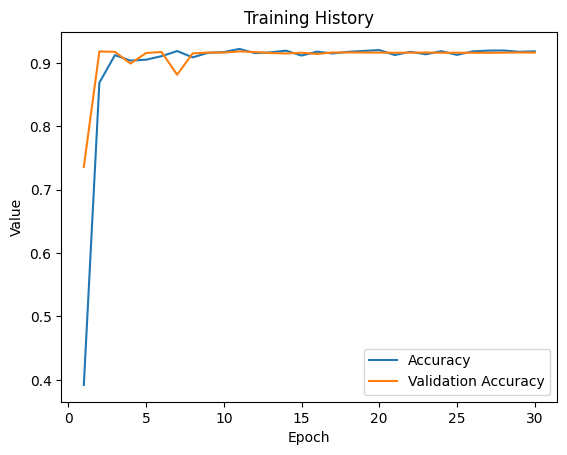

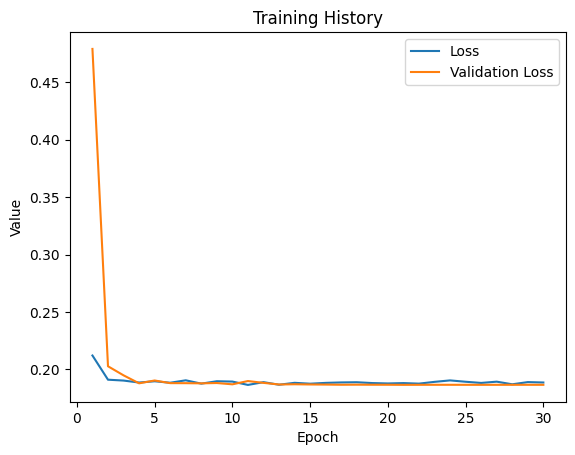

In [648]:
import matplotlib.pyplot as plt

# Assuming you have an object `history` from which you are pulling your data.
epochs = range(1, len(history.history['loss']) + 1)

plt.plot(epochs, history.history['acc'], label='Accuracy')
plt.plot(epochs, history.history['val_acc'], label='Validation Accuracy')

plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()  # This adds a legend using the labels provided in the plot functions.

plt.show()

plt.plot(epochs, history.history['loss'], label='Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')

plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()  # This adds a legend using the labels provided in the plot functions.

plt.show()

In [649]:
# tunerA = kt.BayesianOptimization(unet_plus_plus_model,
#                      objective='val_loss',
#                      directory='my_dir',
#                      max_trials= 10,
#                      project_name='design_a',
#                     #  seed=42,
#                      )

# stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# tunerA.search(train_generator, epochs=100, validation_data=test_generator, callbacks=[stop_early])

# # Get the optimal hyperparameters
# best_hpsA=tunerA.get_best_hyperparameters(num_trials=1)[0]


# print(best_hpsA.values)

## Testing

In [650]:
# model = unet_plus_plus_model(best_hpsA)
# model.summary()

In [651]:
def unprocess_label(label, maxPh, minPh, maxMoisture, minMoisture):
    moisture = np.array(label[0::2], dtype=float) * (float(maxMoisture) - float(minMoisture)) + float(minMoisture)
    ph = np.array(label[1::2], dtype=float) * (float(maxPh) - float(minPh)) + float(minPh)
    output = [moisture, ph]
    return output

In [652]:
NUMBER = 999
sample = Xs[NUMBER]
truth = Ys[NUMBER]

In [653]:
processed_sample = process_image(sample)
normalized_processed_sample = processed_sample/255.

processed_truth = process_label(sample, truth, MAXPH, MINPH, MAXMOISTURE, MINMOISTURE)
mask = get_mask(sample)

output = model.predict(np.array([normalized_processed_sample]))


1/1 [==============================] - 0s 348ms/step


In [654]:
# processed_output = cv2.bitwise_and(output, output, mask)
indices = np.argwhere(mask > 0)
# output = unnormalize_label(output[0], MAXPH, MINPH, MAXMOISTURE, MINMOISTURE)
result = []
for i in indices:
    result.extend(output[0,i[0],i[1]])
print(result)

[0.47917742, 0.21210477, 0.47801203, 0.21127678, 0.47597003, 0.20328954, 0.4762157, 0.20267601, 0.47355217, 0.1958171, 0.47355217, 0.1958171, 0.475433, 0.19757944, 0.4782598, 0.20191218, 0.47859275, 0.20595568, 0.47653046, 0.20405862, 0.48096672, 0.21159394, 0.47723317, 0.20306027, 0.48050895, 0.22515084, 0.4779132, 0.21976413, 0.4479525, 0.22352935, 0.47917742, 0.21210477, 0.47801203, 0.21127678, 0.47665074, 0.20412436, 0.47841817, 0.20507285, 0.4751497, 0.19746006, 0.47595155, 0.19876076, 0.4780544, 0.20191778, 0.47869974, 0.20342171, 0.4798037, 0.20834658, 0.4798037, 0.20834658, 0.4779399, 0.20537208, 0.4786673, 0.20588006, 0.4800914, 0.22238912, 0.48019615, 0.2235507, 0.44879314, 0.22813255, 0.4775457, 0.21060844, 0.47621608, 0.20957215, 0.4737605, 0.21198119, 0.47248498, 0.20971835, 0.4779888, 0.20245712, 0.47816885, 0.20364572, 0.48166892, 0.21738204, 0.4802222, 0.21508783, 0.48069972, 0.21640368, 0.4804758, 0.21507208, 0.48132506, 0.2222855, 0.4792038, 0.2170436, 0.47964987, 0.2

In [655]:
# finalMoisture = np.mean(result[0::2])
# finalPh = np.mean(result[1::2])

unnormalized_label = unprocess_label(result, MAXPH, MINPH, MAXMOISTURE, MINMOISTURE)

finalMoisture = np.mean(unnormalized_label[0])
finalPh = np.mean(unnormalized_label[1])


print(f"Truth: Moisture = {truth[0]}, pH = {truth[1]}")
print(f"Predictions: Moisture = {finalMoisture:.2f}, pH = {finalPh:.2f}")

Truth: Moisture = 0.16, pH = 3.72
Predictions: Moisture = 0.19, pH = 4.19


# Final Functions

## Saving

In [656]:

import os
version = len(os.listdir('models'))
folder = f'.\\models\\model_v{version}'
os.mkdir(folder)



In [657]:

model_path = f'.\\models\\model_v{version}\\model_v{version}.h5'
model.save(model_path)

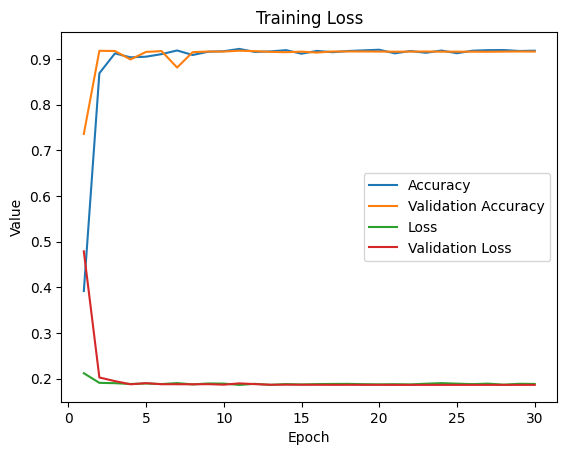

In [658]:
import matplotlib.pyplot as plt

# Assuming you have an object `history` from which you are pulling your data.
epochs = range(1, len(history.history['loss']) + 1)

plt.plot(epochs, history.history['acc'], label='Accuracy')
plt.plot(epochs, history.history['val_acc'], label='Validation Accuracy')

plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()  # This adds a legend using the labels provided in the plot functions.

plt.savefig(os.path.join(folder,'acc.png'))

plt.plot(epochs, history.history['loss'], label='Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')

plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()  # This adds a legend using the labels provided in the plot functions.

plt.savefig(os.path.join(folder,'loss.png'))

In [659]:
import os
import numpy as np

metric = 'val_acc'
best_epoch = np.argmax(history.history[metric])

best_loss = history.history['loss'][best_epoch]
best_val_loss = history.history['val_loss'][best_epoch]
best_acc = history.history['acc'][best_epoch]
best_val_acc = history.history['val_acc'][best_epoch]

output_text = f"""Loss: {best_loss}
Val Loss: {best_val_loss}
Acc: {best_acc}
Val Acc: {best_val_acc}
"""

with open(os.path.join(folder, 'details.txt'), 'w') as f:
    f.write(output_text)

print("Details written to file:")
print(output_text)


Details written to file:
Loss: 0.18652735650539398
Val Loss: 0.1899086833000183
Acc: 0.9222099781036377
Val Acc: 0.9182726740837097



In [660]:
import os
import csv

with open(os.path.join(folder, 'limits.csv'), 'w', newline='') as f:
    writer = csv.writer(f) 
    writer.writerow(['label', 'value'])  

    writer.writerow(['MINPH', MINPH])
    writer.writerow(['MAXPH', MAXPH])
    writer.writerow(['MINMOISTURE', MINMOISTURE])
    writer.writerow(['MAXMOISTURE', MAXMOISTURE])
    
print("CSV file has been written with header and sample data.")


CSV file has been written with header and sample data.


## Exports

In [332]:
import cv2
import numpy as np
import tensorflow as tf

In [333]:
def load_model(path):
    return tf.keras.models.load_model(path)

In [334]:
def center_crop(img, dim):
  """Returns center cropped image

  Args:
  img: image to be center cropped
  dim: dimensions (width, height) to be cropped from center
  """
  center = img.shape
  h = img.shape[0]
  w = img.shape[1]
  x = center[1]/2 - dim/2
  y = center[0]/2 - dim/2

  crop_img = img[int(y):int(y+h), int(x):int(x+w)]
  return crop_img

def get_mask(image):
    image = image.astype(np.uint8)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    binr = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    binr = np.invert(binr)

    kernel = np.ones((3, 3), np.uint8)
    mask = cv2.erode(binr, kernel, iterations=3)
    
    return mask

def process_image(image):
    rgb_image = image.astype(np.uint8)

    mask = get_mask(rgb_image)
    output = cv2.bitwise_and(rgb_image, rgb_image, mask=mask)

    rgb_planes = cv2.split(output)
    result_planes = []
    for plane in rgb_planes:
        processed_image = cv2.medianBlur(plane, 3)
        result_planes.append(processed_image)
    result = cv2.merge(result_planes)

    return result

In [335]:
def load_limits(path):
    with open(path, 'r') as f:
        reader = csv.reader(f)
        next(reader)
        MINPH = float(next(reader)[1])
        MAXPH = float(next(reader)[1])
        MINMOISTURE = float(next(reader)[1])
        MAXMOISTURE = float(next(reader)[1])
            
    return { 'MINPH':MINPH,  'MAXPH':MAXPH , 'MINMOISTURE':MINMOISTURE , 'MAXMOISTURE':MAXMOISTURE }

In [336]:
def unprocess_label(label, maxPh, minPh, maxMoisture, minMoisture):
    moisture = np.array(label[0::2], dtype=float) * (float(maxMoisture) - float(minMoisture)) + float(minMoisture)
    ph = np.array(label[1::2], dtype=float) * (float(maxPh) - float(minPh)) + float(minPh)
    output = [moisture, ph]
    return output

In [348]:
def get_analysis(input, model):
    image = process_image(input)
    normalized_image = image/255.
    result = model.predict(np.array([normalized_image]))[0]
    processed_result = unprocess_label(result,MINPH, MAXPH, MINMOISTURE, MAXMOISTURE)
    finalMoisture = np.mean(processed_result[0])
    finalPh = np.mean(processed_result[1])
    return {'moisture': f'{finalMoisture:.2f}', 'ph': f'{finalPh:.2f}'}

In [349]:
## Exports in use
BASE_PATH = "models\\model_v1"
MODEL = load_model(os.path.join(BASE_PATH,'model_v1.h5'))

In [350]:
# Correct way to unpack a dictionary
limits = load_limits(os.path.join(BASE_PATH,'limits.csv'))
MINPH = limits['MINPH']
MAXPH = limits['MAXPH']
MINMOISTURE = limits['MINMOISTURE']
MAXMOISTURE = limits['MAXMOISTURE']


In [367]:
TEST = 711

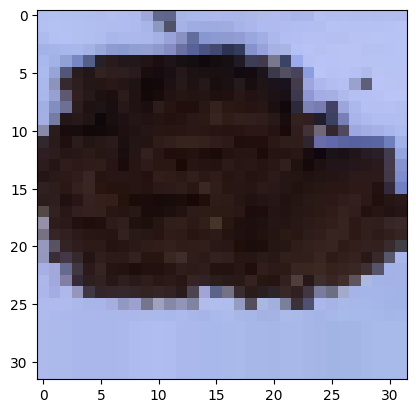

In [368]:
import matplotlib.pyplot as plt
plt.imshow(Xs[TEST])
plt.show()

In [369]:
RESULT = get_analysis(Xs[TEST], MODEL)

1/1 [==============================] - 0s 19ms/step


In [370]:
print("TRUTH: ", Ys[TEST])
print("PREDICTION: ",RESULT)

TRUTH:  [0.22 4.46]
PREDICTION:  {'moisture': '0.35', 'ph': '5.43'}
